In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING EXTRACTED FEATURE FILE

In [2]:
# Load the Data
features_df = pd.read_csv('extracted_features_N.csv')
print(features_df.head(5))

          0         1         2         3          4         5         6  \
0  0.071389  3.814078  0.999701  0.000597  88.182169  0.049710  4.913759   
1  0.071402  3.813144  0.999745  0.000511  88.182039  0.038049  5.260249   
2  0.071384  3.814487  0.999682  0.000637  88.181338  0.023888  5.866610   
3  0.071414  3.812236  0.999786  0.000428  88.182372  0.047350  5.013420   
4  0.071402  3.813133  0.999745  0.000510  88.181743  0.037990  5.219538   

          7         8          9  ...        110        111        112  \
0  0.801248  0.562540  85.041366  ... -17.935225   4.226306  -6.429641   
1  0.768980  0.718595  85.590162  ...  -6.487690  -6.045942  -7.189001   
2  0.711899  1.250710  87.447283  ...  -7.463267  -7.230895 -11.165860   
3  0.821588  0.511744  87.289993  ...  -7.707857  -6.634327  -1.865321   
4  0.762175  0.791641  86.069535  ...   3.472972 -14.792637   3.679448   

         113        114       115        116       117       118       119  
0 -13.648279  -0.6641

PERFORMING EDA

In [3]:
# Display Basic Information
print("Basic Information:")
print(features_df.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Columns: 120 entries, 0 to 119
dtypes: float64(120)
memory usage: 740.8 KB
None


In [4]:
# Check for Missing Values
print("\nMissing Values:")
print(features_df.isnull().sum())


Missing Values:
0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Length: 120, dtype: int64


In [5]:
# Summary Statistics
print("\nSummary Statistics:")
print(features_df.describe())


Summary Statistics:
                0           1           2           3           4           5  \
count  790.000000  790.000000  790.000000  790.000000  790.000000  790.000000   
mean     0.071363    3.815824    0.999608    0.000784   88.181203    0.047297   
std      0.000074    0.004983    0.000260    0.000520    0.001816    0.024805   
min      0.071062    3.809804    0.998551    0.000216   88.168887    0.013646   
25%      0.071365    3.812890    0.999615    0.000487   88.180912    0.033681   
50%      0.071388    3.814200    0.999695    0.000609   88.181680    0.041663   
75%      0.071405    3.815874    0.999756    0.000770   88.182216    0.054401   
max      0.071444    3.835162    0.999892    0.002898   88.183712    0.426104   

                6           7           8           9  ...         110  \
count  790.000000  790.000000  790.000000  790.000000  ...  790.000000   
mean     5.130135    0.784519    0.847278   86.290650  ...   -1.362984   
std      0.537872    0.0659

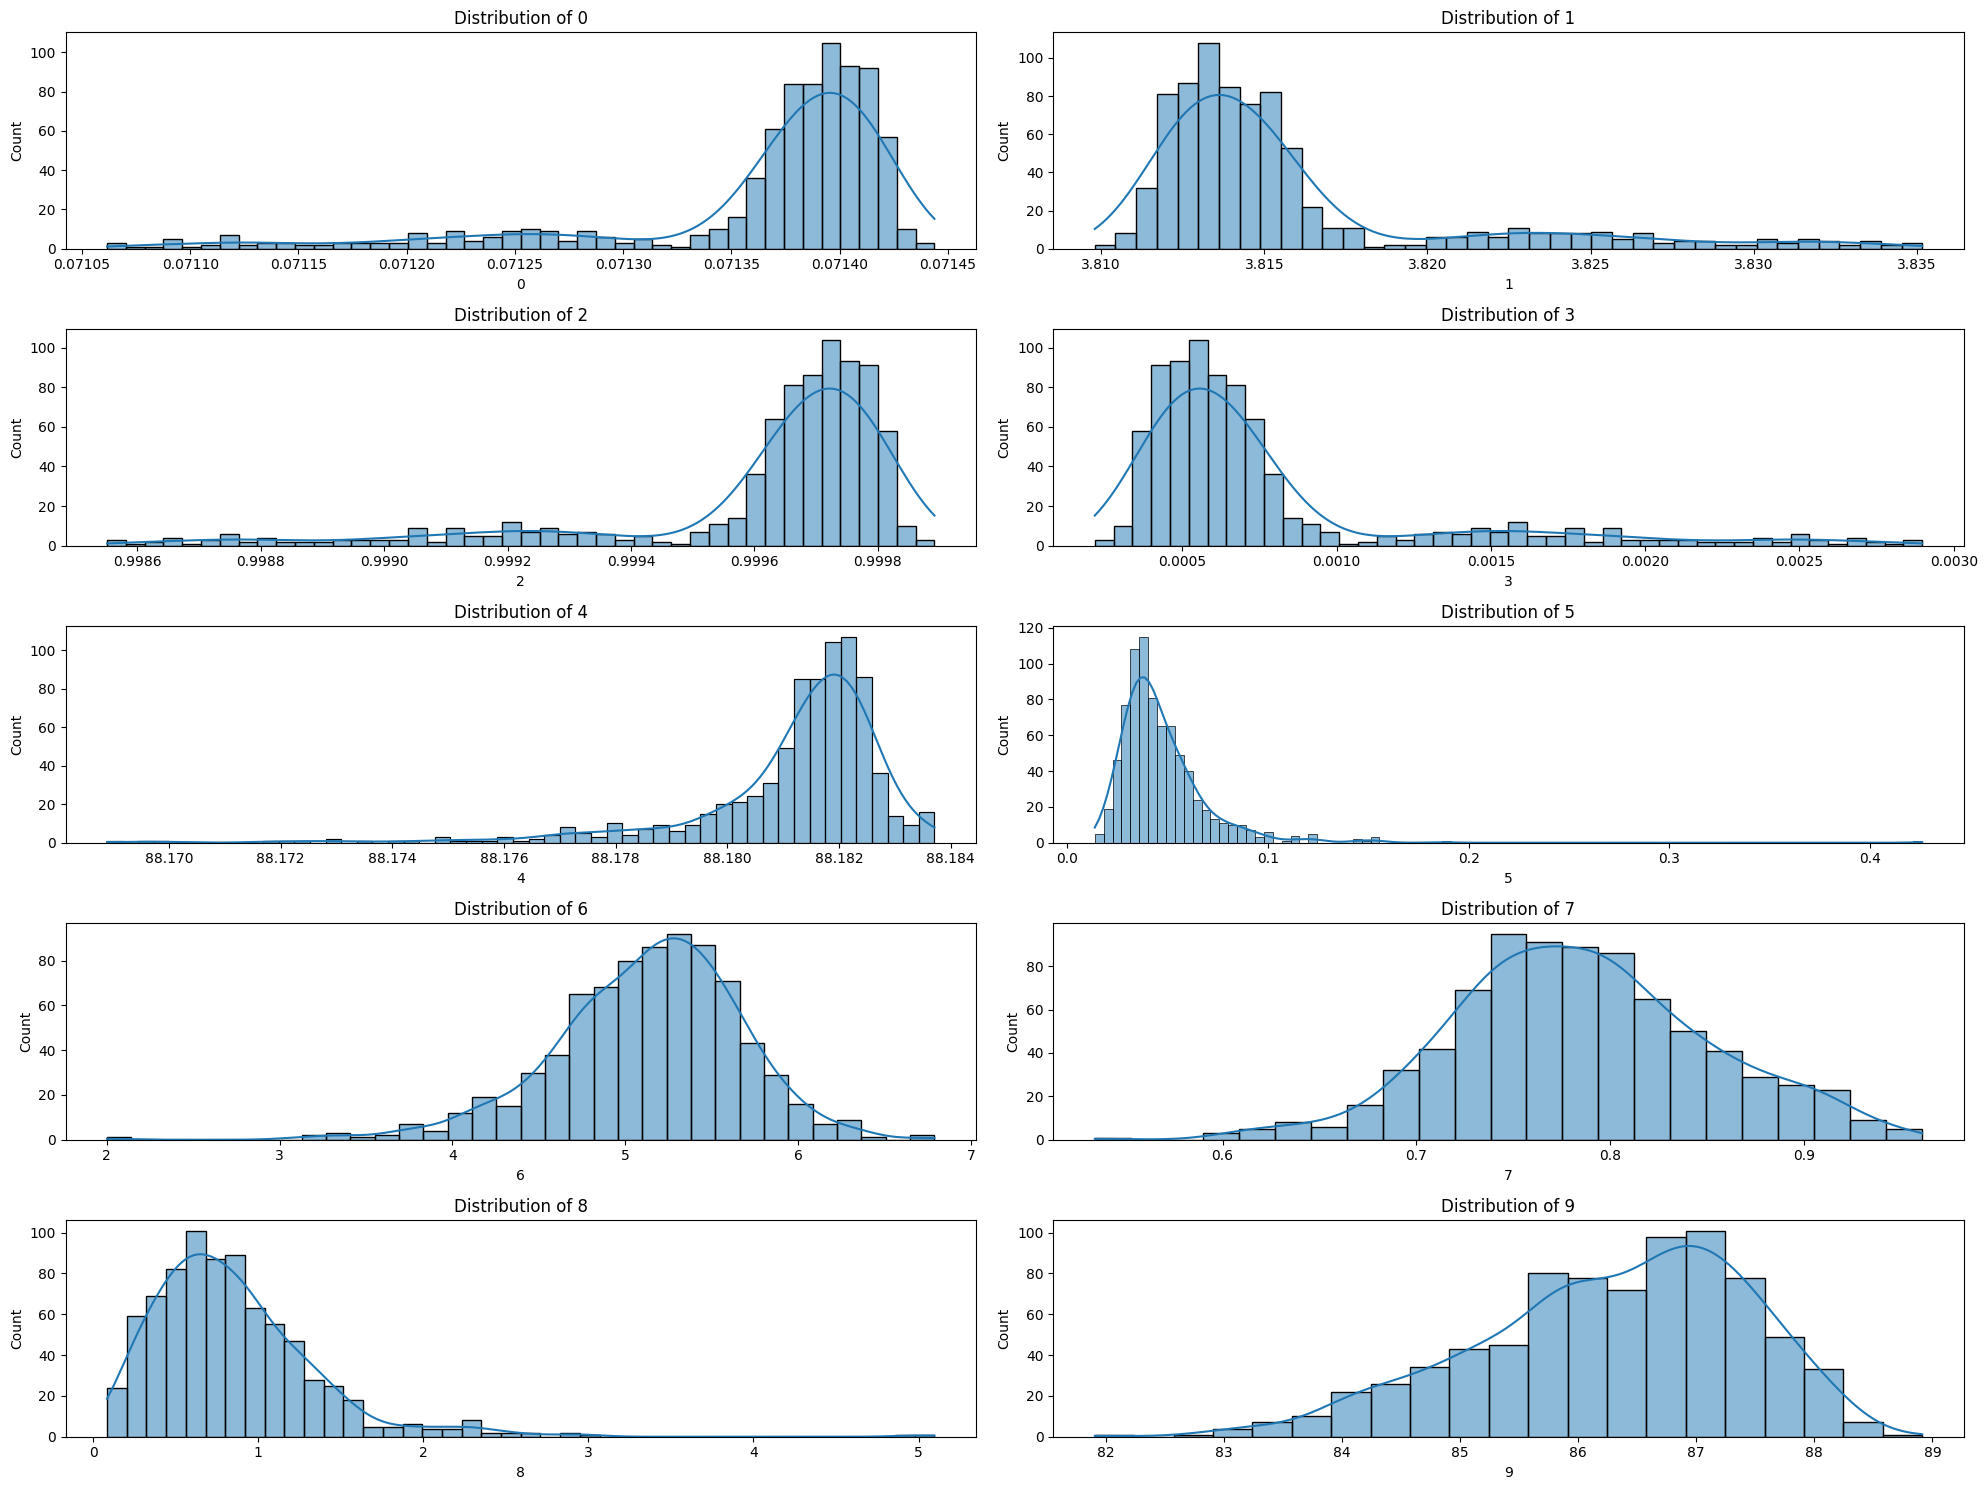

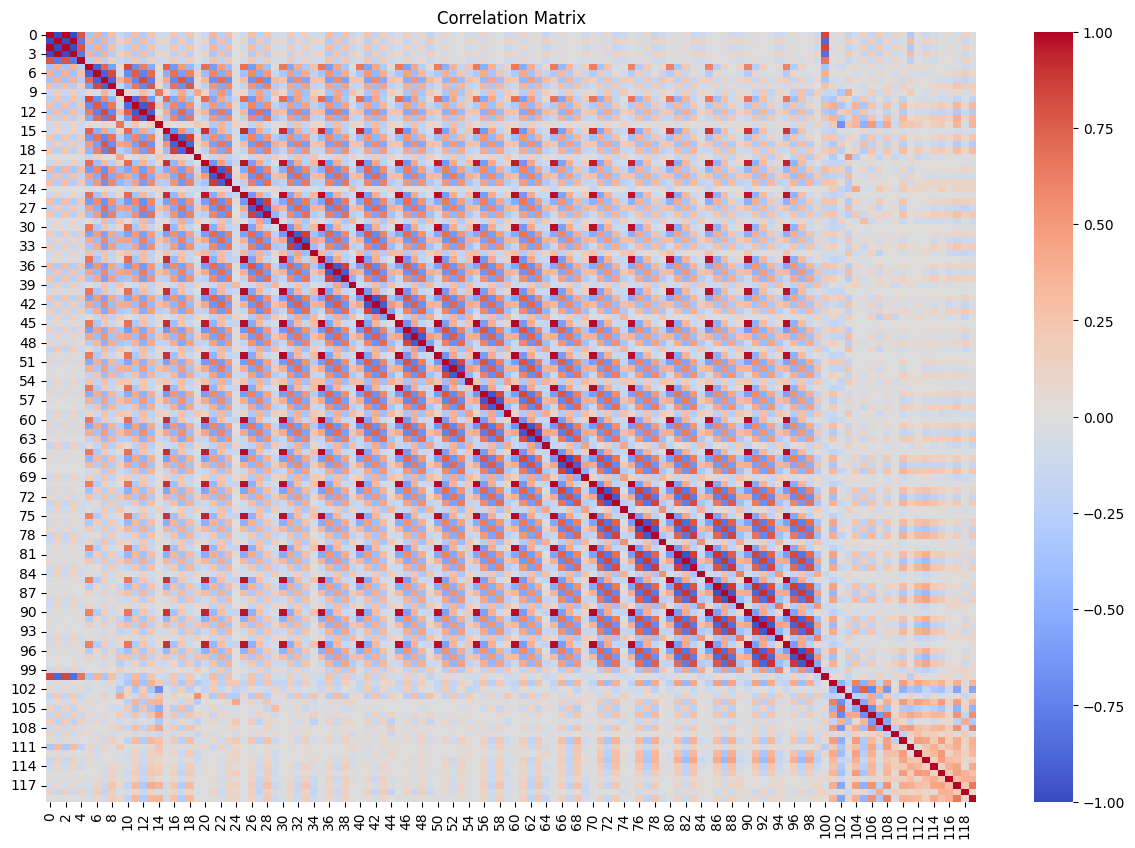

In [6]:
import seaborn as sns

# Visualize Feature Distributions
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_df.columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.histplot(features_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(15, 10))
correlation_matrix = features_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Droping features using Correlation 

In [8]:
import pandas as pd

# Assuming df is your original DataFrame
# Compute the correlation matrix
correlation_matrix = features_df.corr().abs()

# Create a mask to identify columns with correlation > 0.9
# We will set the diagonal to 0 so that self-correlation is not considered
mask = (correlation_matrix > 0.9) & (correlation_matrix < 1)

# Get the list of columns to drop
columns_to_drop = [column for column in mask.columns if any(mask[column])]

# Drop the identified columns
df_reduced = features_df.drop(columns=columns_to_drop)

# Display the reduced DataFrame
print(f"Columns dropped: {columns_to_drop}")
print(df_reduced.head())

# Optionally, save to a new CSV
df_reduced.to_csv('reduced_dataframe.csv', index=False)


Columns dropped: ['0', '1', '2', '3', '11', '12', '13', '15', '16', '17', '20', '21', '22', '23', '25', '26', '27', '28', '30', '31', '32', '33', '35', '36', '37', '38', '40', '41', '42', '43', '45', '46', '47', '48', '50', '51', '52', '53', '55', '56', '57', '58', '60', '61', '62', '63', '65', '66', '67', '68', '70', '71', '72', '73', '75', '76', '77', '78', '80', '81', '82', '83', '85', '86', '87', '88', '90', '91', '92', '93', '95', '96', '97', '98']
           4         5         6         7         8          9        10  \
0  88.182169  0.049710  4.913759  0.801248  0.562540  85.041366  0.050937   
1  88.182039  0.038049  5.260249  0.768980  0.718595  85.590162  0.032724   
2  88.181338  0.023888  5.866610  0.711899  1.250710  87.447283  0.022682   
3  88.182372  0.047350  5.013420  0.821588  0.511744  87.289993  0.037991   
4  88.181743  0.037990  5.219538  0.762175  0.791641  86.069535  0.029143   

          14        18         19  ...        110        111        112  \
0  8

In [9]:
Corr_df=pd.read_csv('reduced_dataframe.csv')
print(Corr_df.head())

           4         5         6         7         8          9        10  \
0  88.182169  0.049710  4.913759  0.801248  0.562540  85.041366  0.050937   
1  88.182039  0.038049  5.260249  0.768980  0.718595  85.590162  0.032724   
2  88.181338  0.023888  5.866610  0.711899  1.250710  87.447283  0.022682   
3  88.182372  0.047350  5.013420  0.821588  0.511744  87.289993  0.037991   
4  88.181743  0.037990  5.219538  0.762175  0.791641  86.069535  0.029143   

          14        18         19  ...        110        111        112  \
0  84.063187  0.991545  86.290076  ... -17.935225   4.226306  -6.429641   
1  83.217923  0.848456  87.167607  ...  -6.487690  -6.045942  -7.189001   
2  87.157311  1.462624  88.038401  ...  -7.463267  -7.230895 -11.165860   
3  86.743515  0.833739  87.053818  ...  -7.707857  -6.634327  -1.865321   
4  85.230369  1.264743  86.651293  ...   3.472972 -14.792637   3.679448   

         113        114       115        116       117       118       119  
0 -13.648

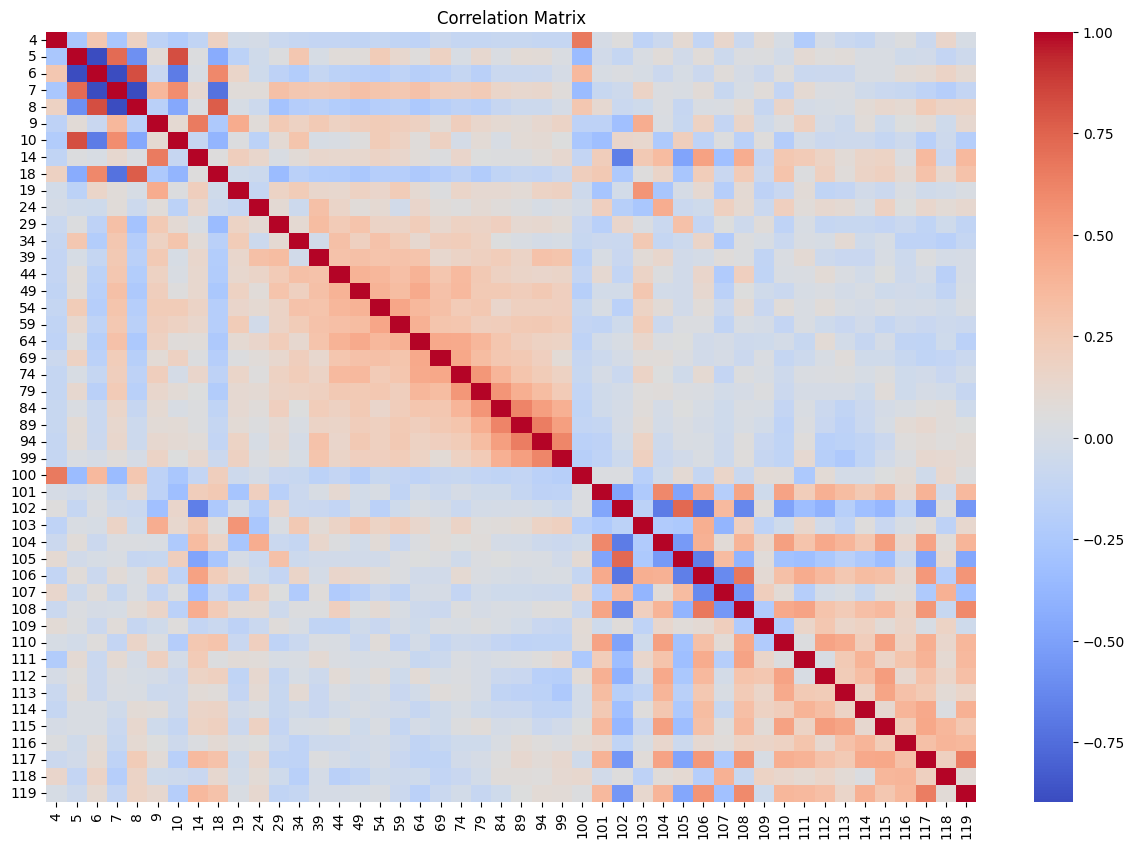

In [10]:
correlation_matrix_2 = Corr_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_2, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
labels_data= pd.read_csv('labels_N.csv',header=None)
labels=[]
for i in range(len(labels_data)):
    labels.append(labels_data[0][i])

In [12]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Load example data (Iris dataset)
data = load_iris()
X = Corr_df   # Features
y = labels  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# language_classifier = joblib.load('random_forest_model.pkl')
# X_test = X_test.drop(columns = ['120_English', '120_Hindi', '120_Marathi'])
# predictions = language_classifier.predict(X_test)
# X_test['120'] = predictions
# X_test = pd.get_dummies(X_test, columns=['120'])

# Initialize and train the Random Forest Classifier


Random Forest Classification Accuracy: 1.00
Random Forest Classification F1 Score: 1.00
Random Forest Classification Precision: 1.00
Random Forest Classification Recall: 1.00
[[112   0   0   0   0   0]
 [  1 126   1   0   0   0]
 [  0   0  70   0   0   0]
 [  0   0   0  91   1   0]
 [  0   0   0   0  92   0]
 [  0   0   0   0   0 138]]
Random Forest Classification Accuracy: 0.77
Random Forest Classification F1 Score: 0.77
Random Forest Classification Precision: 0.77
Random Forest Classification Recall: 0.77
[[33  0  0  0  1  2]
 [ 0 18  0  1  1  2]
 [ 6  2  3  2  0  0]
 [ 4  2  2 14  1  4]
 [ 0  0  0  0 24  0]
 [ 2  2  0  1  2 29]]


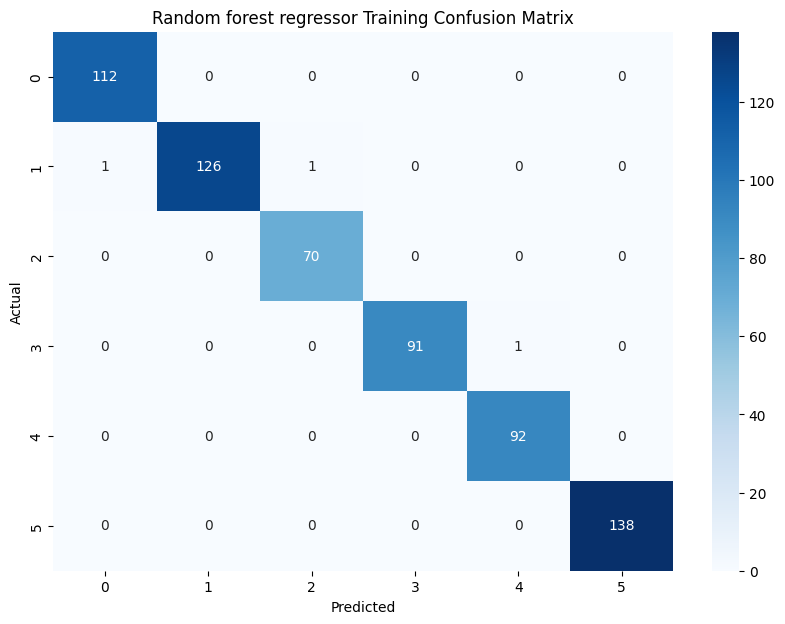

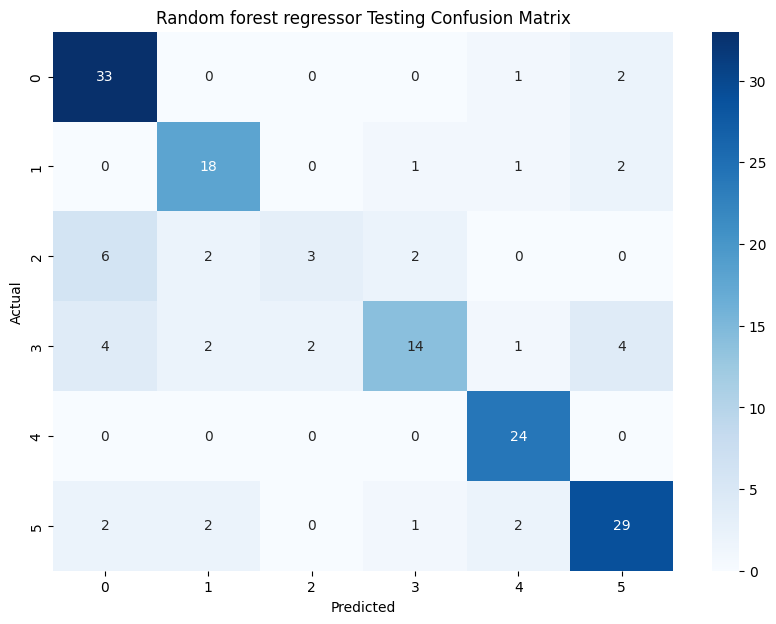

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf = 2)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
y_pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average = 'micro')
precision_train = precision_score(y_train, y_pred_train, average = 'micro')
recall_train = recall_score(y_train, y_pred_train, average = 'micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"Random Forest Classification Accuracy: {accuracy_train:.2f}")
print(f"Random Forest Classification F1 Score: {f1_train:.2f}")
print(f"Random Forest Classification Precision: {precision_train:.2f}")
print(f"Random Forest Classification Recall: {recall_train:.2f}")
print(confusion_mat_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"Random Forest Classification Accuracy: {accuracy:.2f}")
print(f"Random Forest Classification F1 Score: {f1:.2f}")
print(f"Random Forest Classification Precision: {precision:.2f}")
print(f"Random Forest Classification Recall: {recall:.2f}")
print(confusion_mat)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('Random forest regressor Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Random forest regressor Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LogisticRegression Classification Accuracy: 0.91
LogisticRegression Classification F1 Score: 0.91
LogisticRegression Classification Precision: 0.91
LogisticRegression Classification Recall: 0.91
[[109   0   0   2   0   1]
 [  3 117   1   4   0   3]
 [  1   3  54   9   0   3]
 [  3   4   8  73   0   4]
 [  0   0   0   0  92   0]
 [  2   2   0   0   1 133]]
LogisticRegression Classification Accuracy: 0.76
LogisticRegression Classification F1 Score: 0.76
LogisticRegression Classification Precision: 0.76
LogisticRegression Classification Recall: 0.76
[[33  0  1  0  2  0]
 [ 0 17  1  3  0  1]
 [ 4  1  5  3  0  0]
 [ 3  2  7 13  1  1]
 [ 0  0  0  0 24  0]
 [ 0  6  0  2  0 28]]


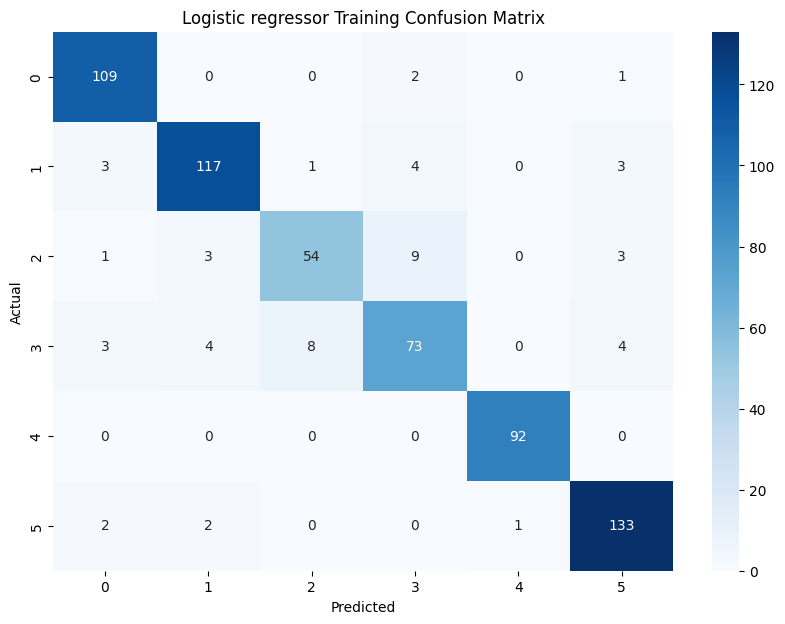

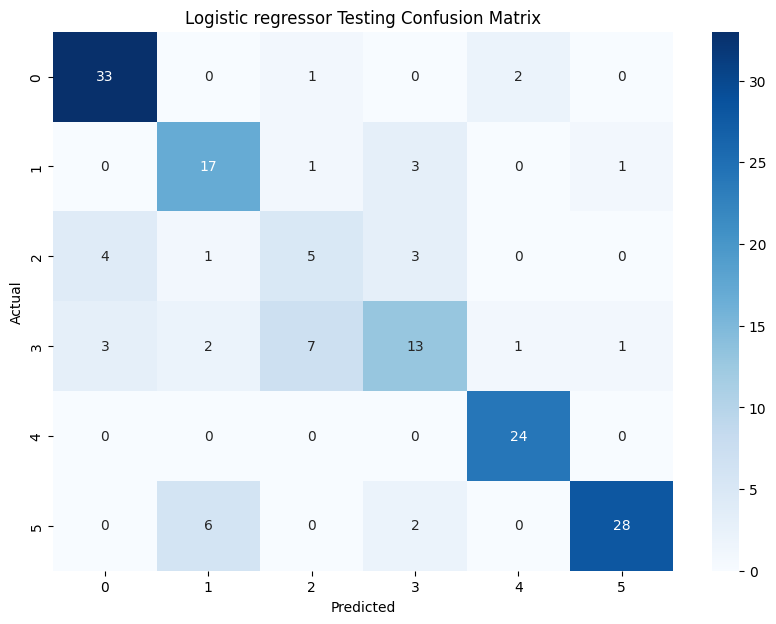

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# logreg = LogisticRegression(solver = 'saga', max_iter = 100000)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average = 'micro')
precision_train = precision_score(y_train, y_pred_train, average = 'micro')
recall_train = recall_score(y_train, y_pred_train, average = 'micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"LogisticRegression Classification Accuracy: {accuracy_train:.2f}")
print(f"LogisticRegression Classification F1 Score: {f1_train:.2f}")
print(f"LogisticRegression Classification Precision: {precision_train:.2f}")
print(f"LogisticRegression Classification Recall: {recall_train:.2f}")
print(confusion_mat_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"LogisticRegression Classification Accuracy: {accuracy:.2f}")
print(f"LogisticRegression Classification F1 Score: {f1:.2f}")
print(f"LogisticRegression Classification Precision: {precision:.2f}")
print(f"LogisticRegression Classification Recall: {recall:.2f}")
print(confusion_mat)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regressor Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regressor Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Classification Accuracy (Train): 0.94
SVM Classification F1 Score (Train): 0.94
SVM Classification Precision (Train): 0.94
SVM Classification Recall (Train): 0.94
Training Confusion Matrix:
 [[112   0   0   0   0   0]
 [  1 117   0   3   0   7]
 [  3   6  58   2   0   1]
 [  1   2   1  84   0   4]
 [  0   0   0   0  92   0]
 [  2   1   0   0   1 134]]
SVM Classification Accuracy (Test): 0.81
SVM Classification F1 Score (Test): 0.81
SVM Classification Precision (Test): 0.81
SVM Classification Recall (Test): 0.81
Testing Confusion Matrix:
 [[33  0  0  0  2  1]
 [ 0 21  0  1  0  0]
 [ 5  2  4  2  0  0]
 [ 3  2  3 15  1  3]
 [ 0  0  0  0 24  0]
 [ 1  2  0  1  1 31]]


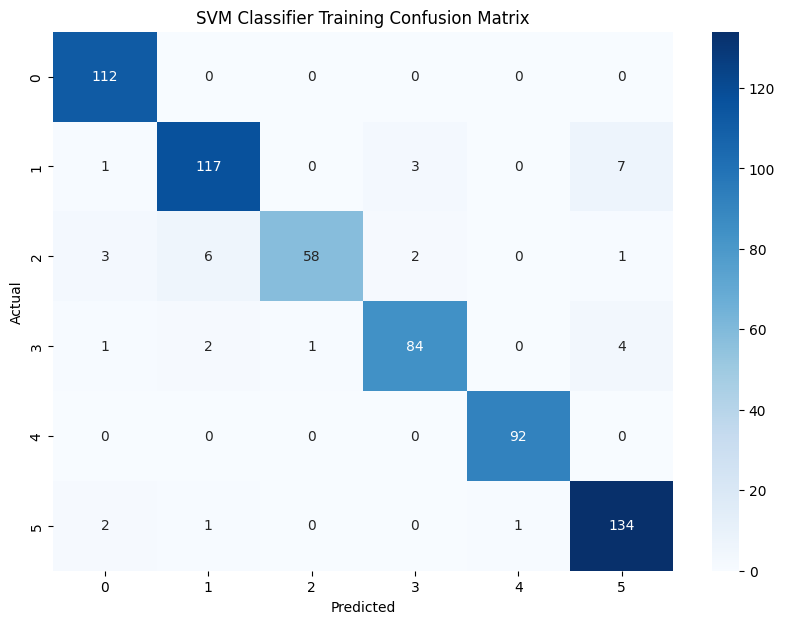

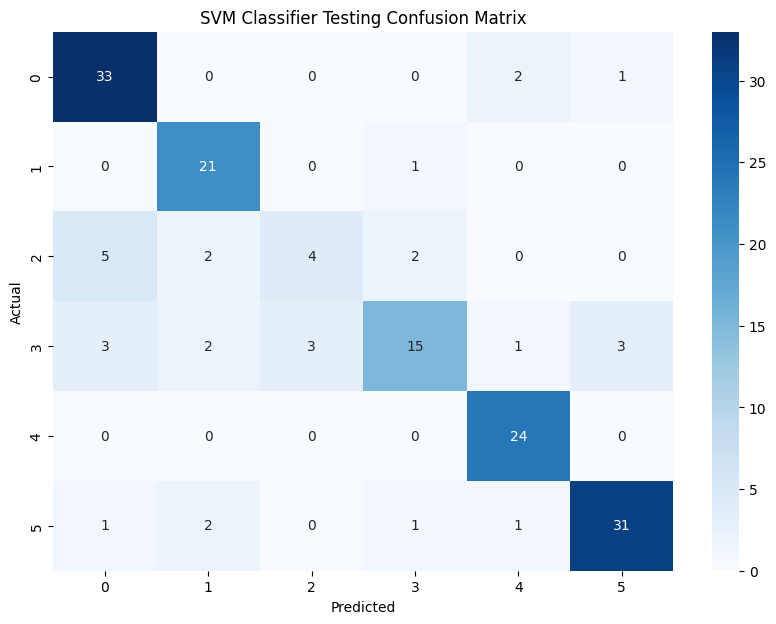

In [15]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Support Vector Classifier model
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate training performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"SVM Classification Accuracy (Train): {accuracy_train:.2f}")
print(f"SVM Classification F1 Score (Train): {f1_train:.2f}")
print(f"SVM Classification Precision (Train): {precision_train:.2f}")
print(f"SVM Classification Recall (Train): {recall_train:.2f}")
print("Training Confusion Matrix:\n", confusion_mat_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate test performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"SVM Classification Accuracy (Test): {accuracy:.2f}")
print(f"SVM Classification F1 Score (Test): {f1:.2f}")
print(f"SVM Classification Precision (Test): {precision:.2f}")
print(f"SVM Classification Recall (Test): {recall:.2f}")
print("Testing Confusion Matrix:\n", confusion_mat)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Classifier Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Classifier Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Classification Accuracy (Train): 0.79
KNN Classification F1 Score (Train): 0.79
KNN Classification Precision (Train): 0.79
KNN Classification Recall (Train): 0.79
Training Confusion Matrix:
 [[112   0   0   0   0   0]
 [  3 106   2   8   0   9]
 [ 12   9  36  10   0   3]
 [  8   4   3  66   2   9]
 [ 18   3   1   0  64   6]
 [ 14   7   0   4   0 113]]
KNN Classification Accuracy (Test): 0.74
KNN Classification F1 Score (Test): 0.74
KNN Classification Precision (Test): 0.74
KNN Classification Recall (Test): 0.74
Testing Confusion Matrix:
 [[36  0  0  0  0  0]
 [ 1 18  0  1  0  2]
 [ 6  1  4  2  0  0]
 [ 6  0  3 13  0  5]
 [ 5  0  0  1 16  2]
 [ 1  2  0  3  0 30]]


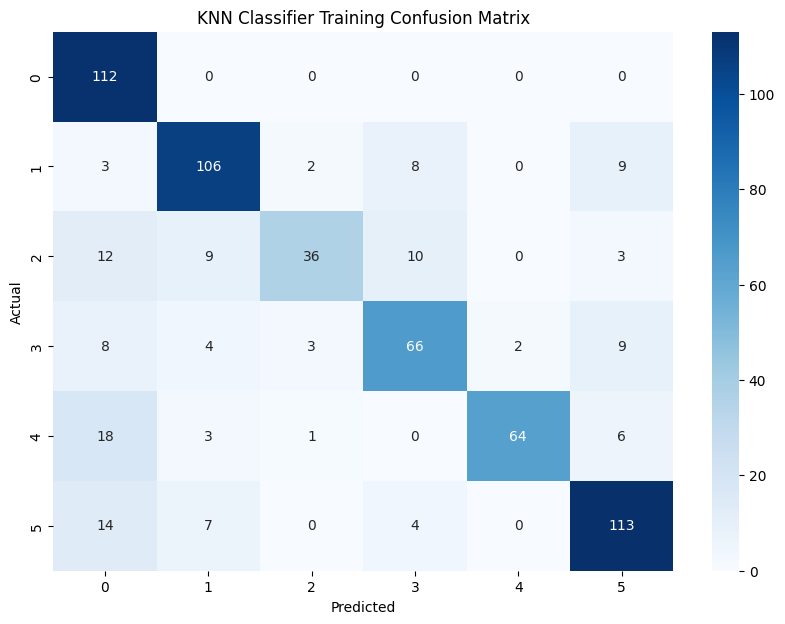

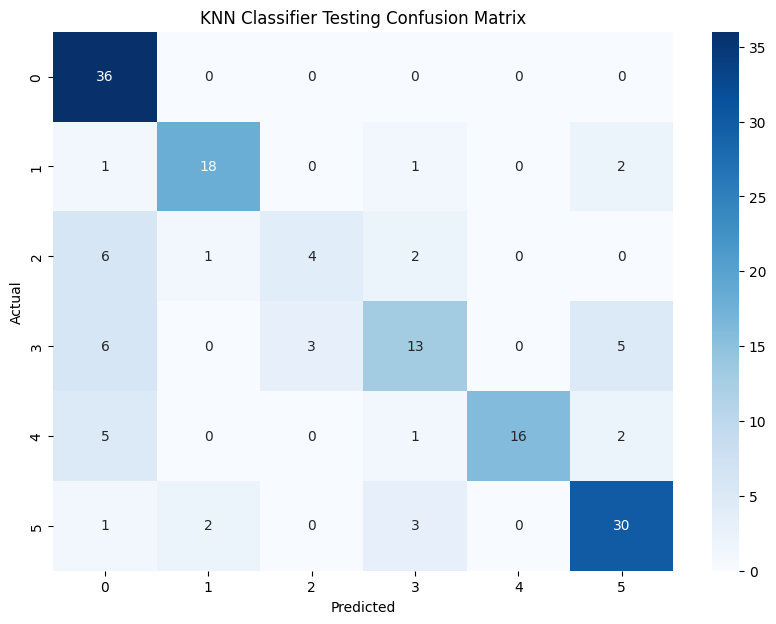

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the K-Nearest Neighbors (KNN) classifier model
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate training performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"KNN Classification Accuracy (Train): {accuracy_train:.2f}")
print(f"KNN Classification F1 Score (Train): {f1_train:.2f}")
print(f"KNN Classification Precision (Train): {precision_train:.2f}")
print(f"KNN Classification Recall (Train): {recall_train:.2f}")
print("Training Confusion Matrix:\n", confusion_mat_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate test performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"KNN Classification Accuracy (Test): {accuracy:.2f}")
print(f"KNN Classification F1 Score (Test): {f1:.2f}")
print(f"KNN Classification Precision (Test): {precision:.2f}")
print(f"KNN Classification Recall (Test): {recall:.2f}")
print("Testing Confusion Matrix:\n", confusion_mat)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



Outliers Detected:
            0         1         2         3          4         5         6  \
5    0.071364  3.815975  0.999610  0.000780  88.181640  0.022095  6.018427   
9    0.071388  3.814212  0.999695  0.000611  88.181828  0.020417  6.329527   
10   0.071402  3.813091  0.999747  0.000505  88.182154  0.044640  5.144581   
17   0.071409  3.812635  0.999768  0.000464  88.181623  0.041609  5.227836   
18   0.071423  3.811538  0.999817  0.000365  88.182631  0.041226  5.131213   
..        ...       ...       ...       ...        ...       ...       ...   
783  0.071074  3.834395  0.998599  0.002803  88.176072  0.039908  5.094130   
784  0.071226  3.825290  0.999121  0.001757  88.173381  0.065561  4.529767   
785  0.071121  3.831753  0.998753  0.002493  88.177503  0.095713  4.008360   
788  0.071117  3.831904  0.998745  0.002510  88.180329  0.039627  5.332924   
789  0.071253  3.823498  0.999220  0.001560  88.178858  0.054007  4.763138   

            7         8          9  ...    

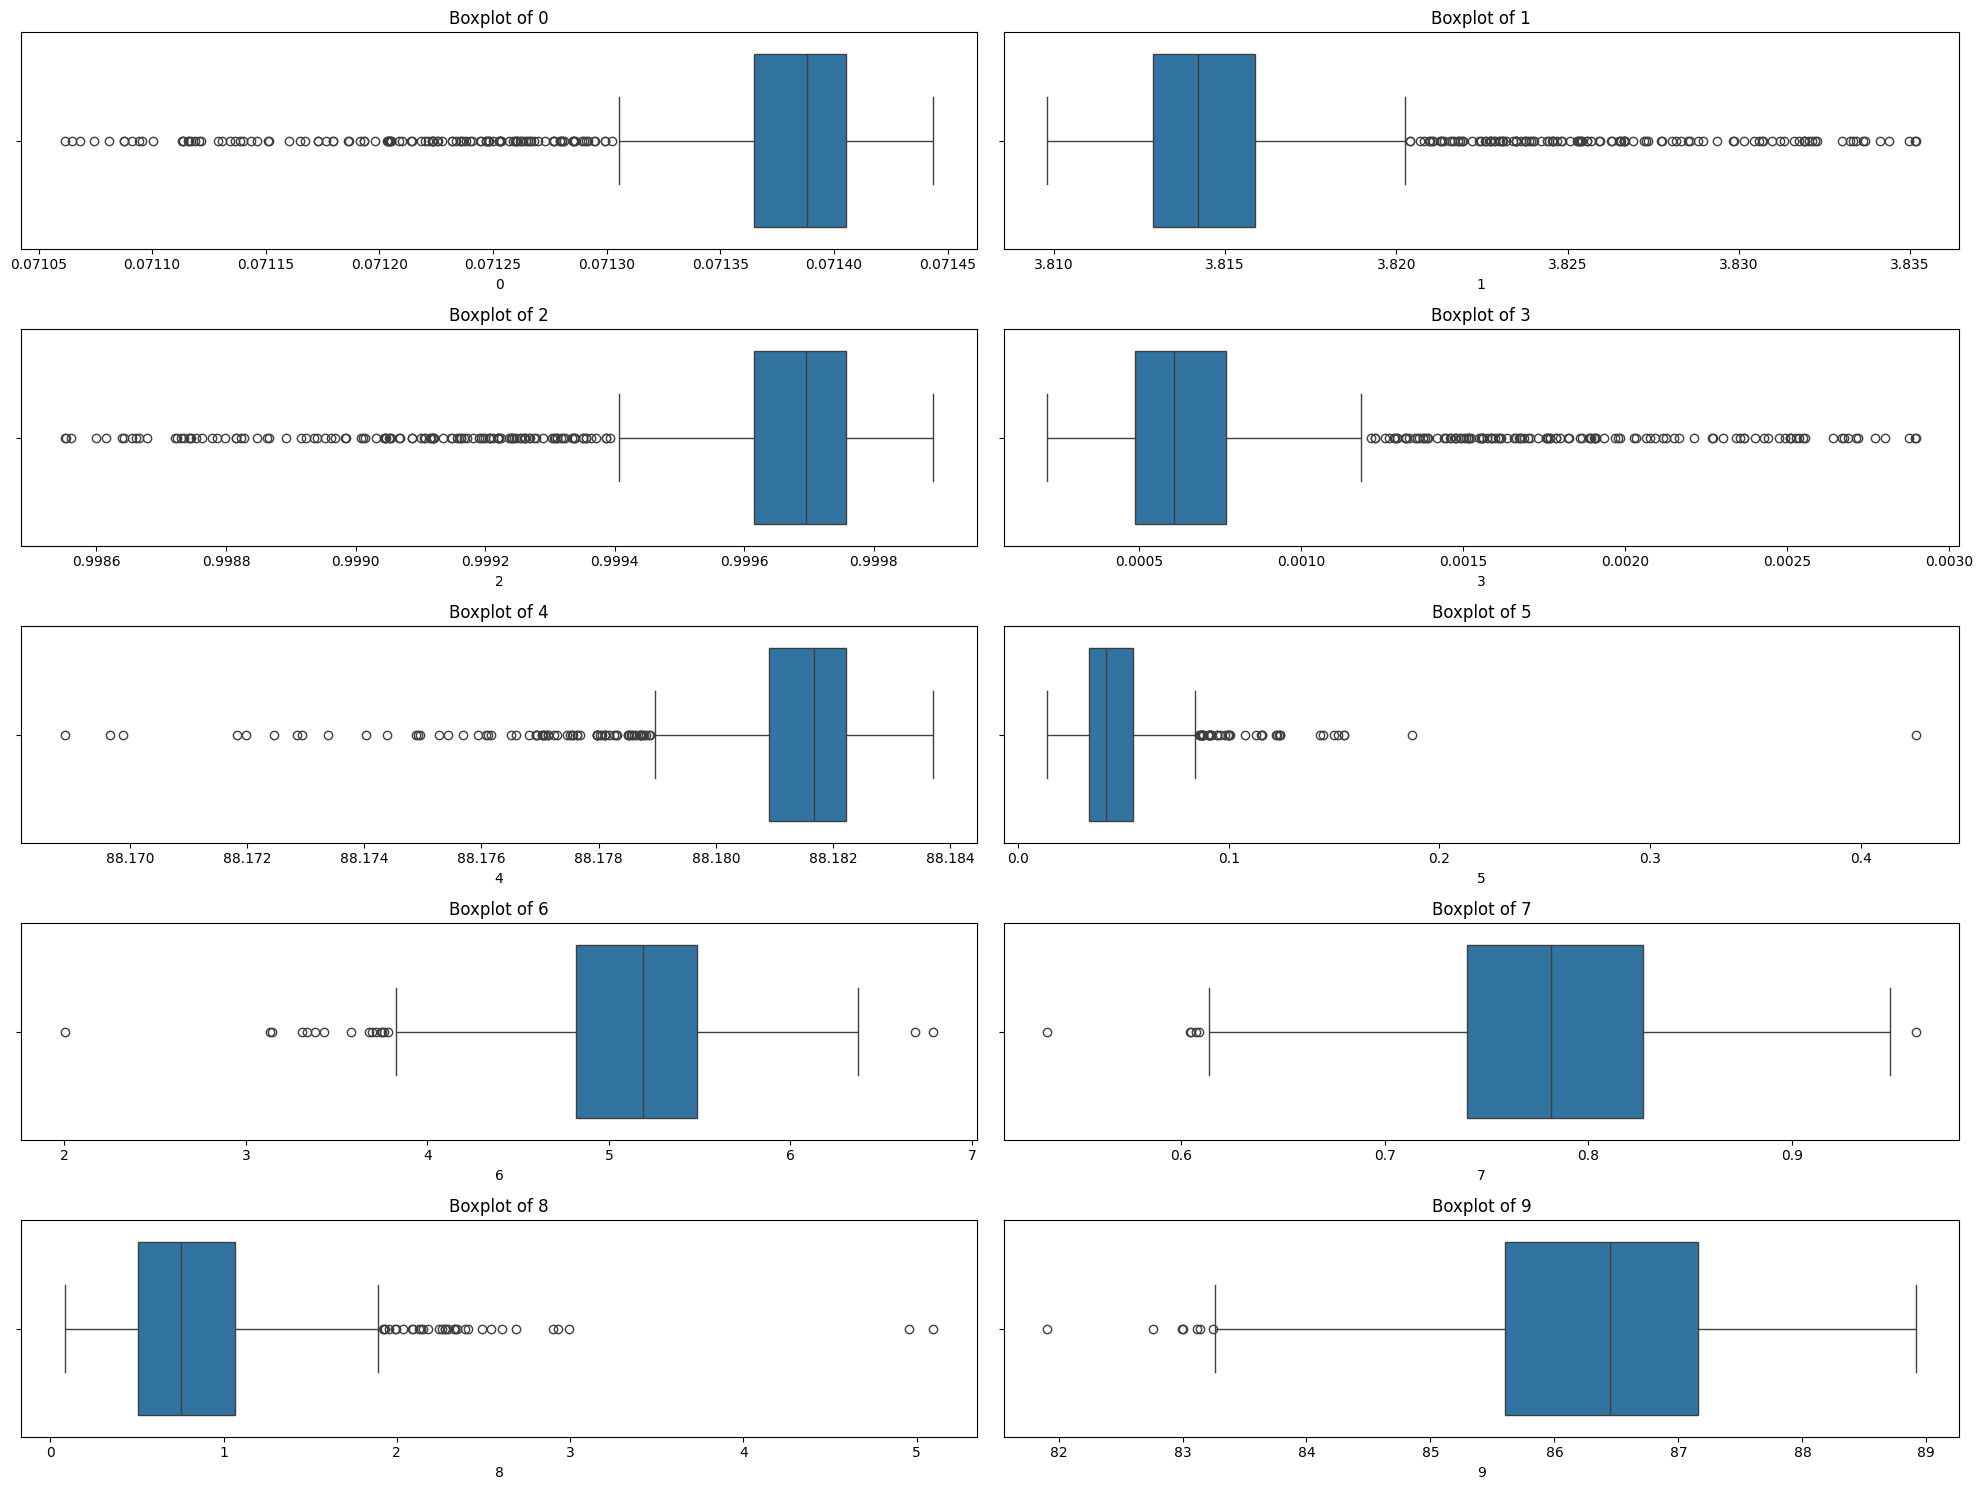

In [21]:
from scipy import stats

# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(features_df))
outliers = (z_scores > 3).sum(axis=1)
outliers_df = features_df[outliers > 0]

print("\nOutliers Detected:")
print(outliers_df)

# Visualize Outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_df.columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=features_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


Outliers Removed DataFrame:
            0         1         2         3          4         5         6  \
0    0.071389  3.814078  0.999701  0.000597  88.182169  0.049710  4.913759   
1    0.071402  3.813144  0.999745  0.000511  88.182039  0.038049  5.260249   
2    0.071384  3.814487  0.999682  0.000637  88.181338  0.023888  5.866610   
3    0.071414  3.812236  0.999786  0.000428  88.182372  0.047350  5.013420   
4    0.071402  3.813133  0.999745  0.000510  88.181743  0.037990  5.219538   
..        ...       ...       ...       ...        ...       ...       ...   
785  0.071121  3.831753  0.998753  0.002493  88.177503  0.095713  4.008360   
786  0.071176  3.828302  0.998953  0.002093  88.177231  0.036254  5.301302   
787  0.071187  3.827723  0.998986  0.002029  88.177635  0.061658  4.761964   
788  0.071117  3.831904  0.998745  0.002510  88.180329  0.039627  5.332924   
789  0.071253  3.823498  0.999220  0.001560  88.178858  0.054007  4.763138   

            7         8          9

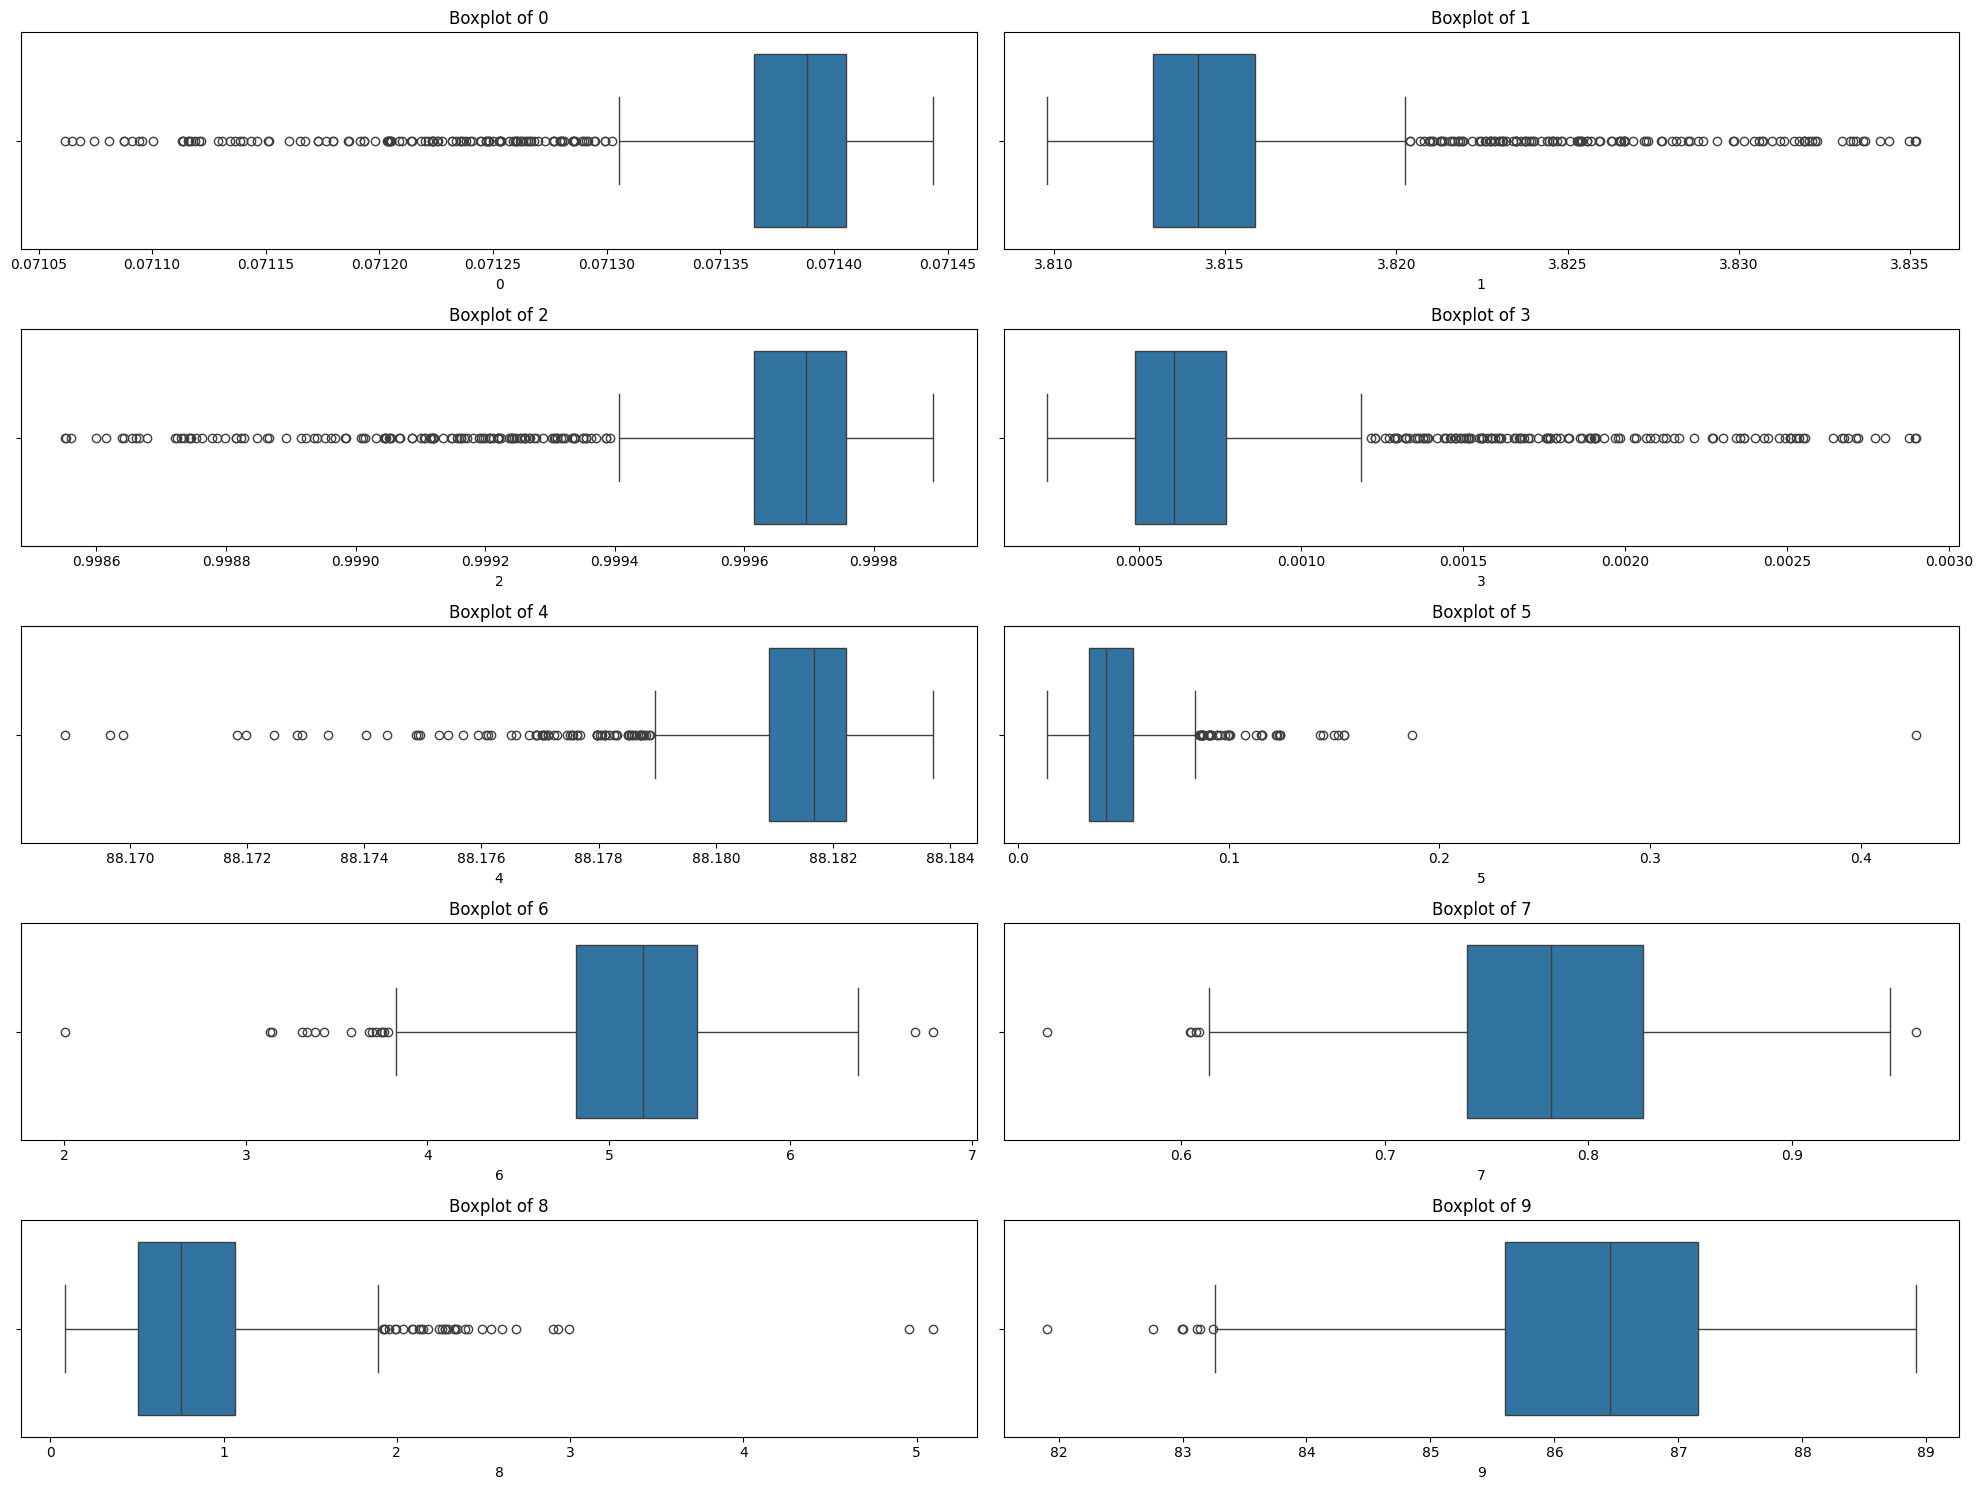

In [22]:
# Outlier Detection using Z-score
z_scores = np.abs(stats.zscore(features_df))
outliers = (z_scores > 3).any(axis=1)
outliers_df = features_df[outliers]


# features_df_no_outliers = features_df[~outliers]
features_df_no_outliers = features_df

print("\nOutliers Removed DataFrame:")
print(features_df_no_outliers)

# Visualize Outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(features_df.columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=features_df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features_df.columns
vif_data["VIF"] = [variance_inflation_factor(features_df.values, i) for i in range(len(features_df.columns))]

print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
    feature           VIF
0         0  7.339234e+04
1         1  6.566773e+03
2         2  1.422556e+11
3         3  1.142612e+05
4         4  6.627472e+00
..      ...           ...
115     115  3.320020e+00
116     116  2.200367e+00
117     117  3.956527e+00
118     118  2.452294e+00
119     119  3.510823e+00

[120 rows x 2 columns]


In [25]:
# Function to calculate VIF and remove features with high VIF
def calculate_vif(df, threshold=5.0):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    
    while vif_data["VIF"].max() > threshold:
        max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
        print(f"Dropping feature '{max_vif_feature}' with VIF: {vif_data['VIF'].max()}")
        df = df.drop(columns=[max_vif_feature])
        vif_data = pd.DataFrame()
        vif_data["feature"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    
    return df, vif_data

# Reduce columns based on VIF
reduced_features_df, final_vif_data = calculate_vif(features_df_no_outliers)

print("\nFinal Variance Inflation Factor (VIF):")
print(final_vif_data)

print("\nReduced Features DataFrame:")
print(reduced_features_df.head())

Dropping feature '2' with VIF: 142255622577.5225
Dropping feature '0' with VIF: 4922222331.072373
Dropping feature '1' with VIF: 2755297338.779055
Dropping feature '86' with VIF: 585154.5645148281
Dropping feature '61' with VIF: 566295.2697460338
Dropping feature '66' with VIF: 498044.17743061815
Dropping feature '91' with VIF: 490718.415868242
Dropping feature '56' with VIF: 435503.2005648126
Dropping feature '81' with VIF: 432136.9107230298
Dropping feature '51' with VIF: 407156.7186328484
Dropping feature '76' with VIF: 359794.62608755846
Dropping feature '4' with VIF: 341357.42743866204
Dropping feature '46' with VIF: 323713.11650236516
Dropping feature '41' with VIF: 282388.0316404476
Dropping feature '71' with VIF: 267877.90842740686
Dropping feature '96' with VIF: 221257.76010618164
Dropping feature '36' with VIF: 169886.6505999864
Dropping feature '31' with VIF: 102335.62396806091
Dropping feature '26' with VIF: 94846.34310666396
Dropping feature '49' with VIF: 63012.5086972744

In [26]:
print("\nFinal Variance Inflation Factor (VIF):")
print(final_vif_data)


Final Variance Inflation Factor (VIF):
   feature       VIF
0        3  2.895131
1        8  3.060784
2       95  1.884367
3      103  2.904632
4      105  1.830753
5      107  3.216824
6      108  4.095184
7      109  2.955741
8      110  3.117479
9      111  3.349532
10     112  2.498357
11     113  2.420745
12     114  3.429938
13     115  2.585962
14     116  3.857422
15     117  2.613029
16     118  2.634514
17     119  2.580029


In [27]:
import pandas as pd

# Final features based on the VIF values
selected_features = [3, 8, 95, 103, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]

# Assuming `df` is your original DataFrame containing features 0 to 119
df_selected = features_df.iloc[:, selected_features]

# Save the new DataFrame to a CSV file (optional)
df_selected.to_csv('selected_features.csv', index=False)

# Display the new DataFrame
print(df_selected.head())


          3         8        95        103        105        107        108  \
0  0.000597  0.562540  0.015681 -67.977267  47.346860 -16.545475  15.021958   
1  0.000511  0.718595  0.014873 -39.027239  24.331278  -4.106360   8.369388   
2  0.000637  1.250710  0.017031 -25.127661  -1.918802 -14.517390   5.858916   
3  0.000428  0.511744  0.019875 -63.905207  25.064980   3.082975   3.078705   
4  0.000510  0.791641  0.016319 -79.857686   5.078712  22.386975 -15.310770   

         109        110        111        112        113        114       115  \
0 -13.127819 -17.935225   4.226306  -6.429641 -13.648279  -0.664116 -5.270646   
1  -5.988375  -6.487690  -6.045942  -7.189001  -6.900216  -8.156427 -0.373632   
2  -7.582647  -7.463267  -7.230895 -11.165860  -9.407235 -10.110008 -4.583664   
3  -1.780602  -7.707857  -6.634327  -1.865321  -9.079019  -3.091034  1.082593   
4  -5.343745   3.472972 -14.792637   3.679448  -9.904233 -10.605612  4.903820   

         116       117       118      

In [28]:
print("\nReduced Features DataFrame:")
print(reduced_features_df.head())


Reduced Features DataFrame:
          3         8        95        103        105        107        108  \
0  0.000597  0.562540  0.015681 -67.977267  47.346860 -16.545475  15.021958   
1  0.000511  0.718595  0.014873 -39.027239  24.331278  -4.106360   8.369388   
2  0.000637  1.250710  0.017031 -25.127661  -1.918802 -14.517390   5.858916   
3  0.000428  0.511744  0.019875 -63.905207  25.064980   3.082975   3.078705   
4  0.000510  0.791641  0.016319 -79.857686   5.078712  22.386975 -15.310770   

         109        110        111        112        113        114       115  \
0 -13.127819 -17.935225   4.226306  -6.429641 -13.648279  -0.664116 -5.270646   
1  -5.988375  -6.487690  -6.045942  -7.189001  -6.900216  -8.156427 -0.373632   
2  -7.582647  -7.463267  -7.230895 -11.165860  -9.407235 -10.110008 -4.583664   
3  -1.780602  -7.707857  -6.634327  -1.865321  -9.079019  -3.091034  1.082593   
4  -5.343745   3.472972 -14.792637   3.679448  -9.904233 -10.605612  4.903820   

         

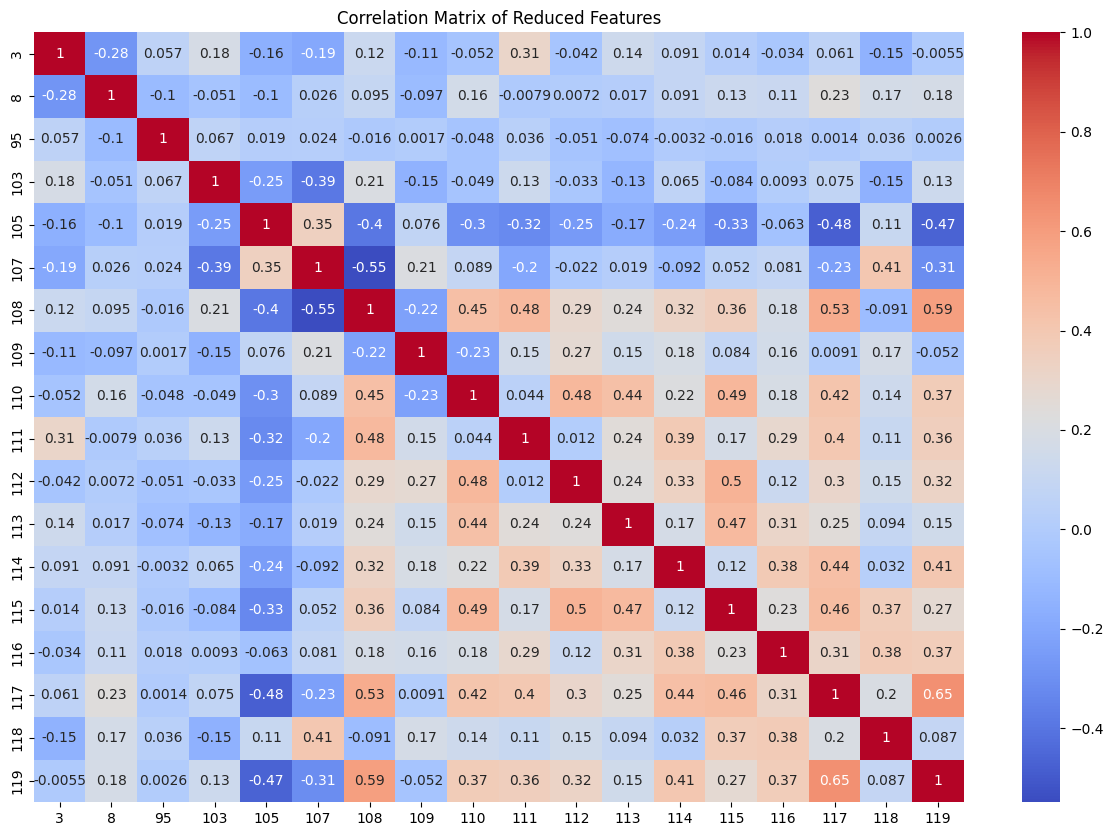

In [29]:
# Correlation Matrix of Reduced Features
plt.figure(figsize=(15, 10))
reduced_correlation_matrix = reduced_features_df.corr()
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Reduced Features')
plt.show()

In [30]:
VIF_DATA= pd.read_csv('selected_features.csv')
print(VIF_DATA)

            3         8        95        103        105        107        108  \
0    0.000597  0.562540  0.015681 -67.977267  47.346860 -16.545475  15.021958   
1    0.000511  0.718595  0.014873 -39.027239  24.331278  -4.106360   8.369388   
2    0.000637  1.250710  0.017031 -25.127661  -1.918802 -14.517390   5.858916   
3    0.000428  0.511744  0.019875 -63.905207  25.064980   3.082975   3.078705   
4    0.000510  0.791641  0.016319 -79.857686   5.078712  22.386975 -15.310770   
..        ...       ...       ...        ...        ...        ...        ...   
785  0.002493  0.222478  0.014902 -14.610168   8.847042  -4.680973  -2.954831   
786  0.002093  1.139452  0.010155 -55.128439 -23.690297 -24.285874  10.582500   
787  0.002029  0.675094  0.018147 -48.384461 -21.279479  -8.731722   5.161875   
788  0.002510  0.720849  0.009484   0.034334 -37.198498 -13.895666  -0.691036   
789  0.001560  0.324214  0.025059   7.035671  -6.153497 -16.532577   8.897033   

           109        110  

In [31]:
labels_data= pd.read_csv('labels_N.csv',header=None)

labels=[]
for i in range(len(labels_data)):
    labels.append(labels_data[0][i])


# for i in range(len(labeled_data)):
#     labels.append(labeled_data['label'][i])

print(len(labels))
# print(labels[789])
# print(labels)

790


In [32]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Load example data (Iris dataset)
data = load_iris()
X = VIF_DATA  # Features
y = labels  # Labels

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# language_classifier = joblib.load('random_forest_model.pkl')
# X_test = X_test.drop(columns = ['120_English', '120_Hindi', '120_Marathi'])
# predictions = language_classifier.predict(X_test)
# X_test['120'] = predictions
# X_test = pd.get_dummies(X_test, columns=['120'])

# Initialize and train the Random Forest Classifier


Random Forest Classification Accuracy: 1.00
Random Forest Classification F1 Score: 1.00
Random Forest Classification Precision: 1.00
Random Forest Classification Recall: 1.00
[[112   0   0   0   0   0]
 [  0 127   1   0   0   0]
 [  0   0  70   0   0   0]
 [  0   0   0  91   1   0]
 [  0   0   0   0  92   0]
 [  0   0   0   0   1 137]]
Random Forest Classification Accuracy: 0.75
Random Forest Classification F1 Score: 0.75
Random Forest Classification Precision: 0.75
Random Forest Classification Recall: 0.75
[[34  1  0  0  0  1]
 [ 0 19  0  1  1  1]
 [ 6  3  3  1  0  0]
 [ 4  3  1 13  2  4]
 [ 0  0  0  0 24  0]
 [ 4  5  0  0  2 25]]


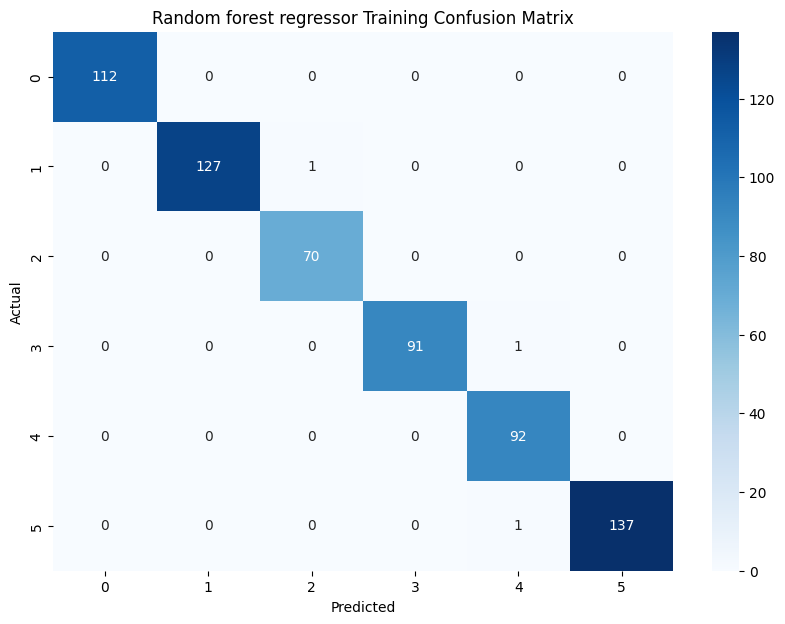

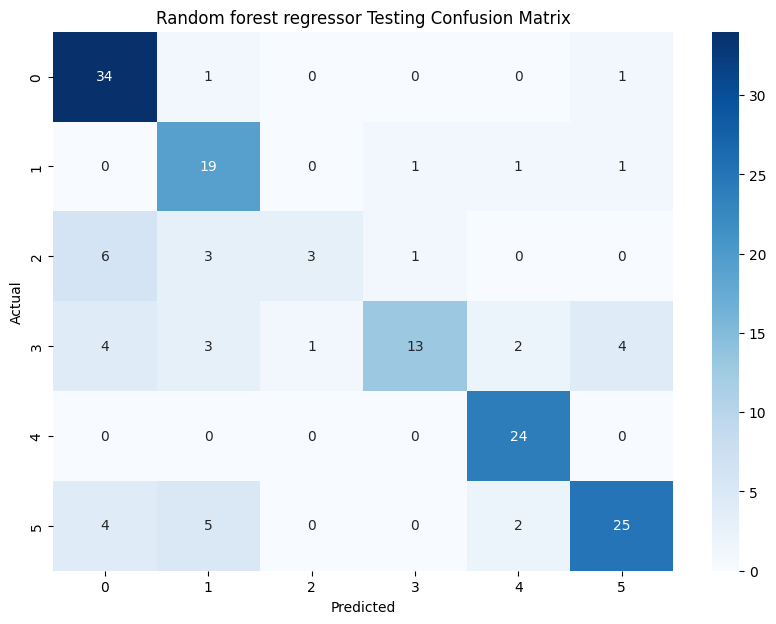

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf = 2)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
y_pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average = 'micro')
precision_train = precision_score(y_train, y_pred_train, average = 'micro')
recall_train = recall_score(y_train, y_pred_train, average = 'micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"Random Forest Classification Accuracy: {accuracy_train:.2f}")
print(f"Random Forest Classification F1 Score: {f1_train:.2f}")
print(f"Random Forest Classification Precision: {precision_train:.2f}")
print(f"Random Forest Classification Recall: {recall_train:.2f}")
print(confusion_mat_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"Random Forest Classification Accuracy: {accuracy:.2f}")
print(f"Random Forest Classification F1 Score: {f1:.2f}")
print(f"Random Forest Classification Precision: {precision:.2f}")
print(f"Random Forest Classification Recall: {recall:.2f}")
print(confusion_mat)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('Random forest regressor Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Random forest regressor Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

LogisticRegression Classification Accuracy: 0.82
LogisticRegression Classification F1 Score: 0.82
LogisticRegression Classification Precision: 0.82
LogisticRegression Classification Recall: 0.82
[[106   0   2   2   0   2]
 [  1 105   3  10   0   9]
 [  7   9  36  14   0   4]
 [  6   9   9  61   2   5]
 [  0   0   0   0  92   0]
 [  8  10   0   0   1 119]]
LogisticRegression Classification Accuracy: 0.73
LogisticRegression Classification F1 Score: 0.73
LogisticRegression Classification Precision: 0.73
LogisticRegression Classification Recall: 0.73
[[32  1  0  1  1  1]
 [ 0 17  1  2  1  1]
 [ 6  3  3  1  0  0]
 [ 5  3  3 14  1  1]
 [ 0  0  0  0 24  0]
 [ 2  6  0  1  2 25]]


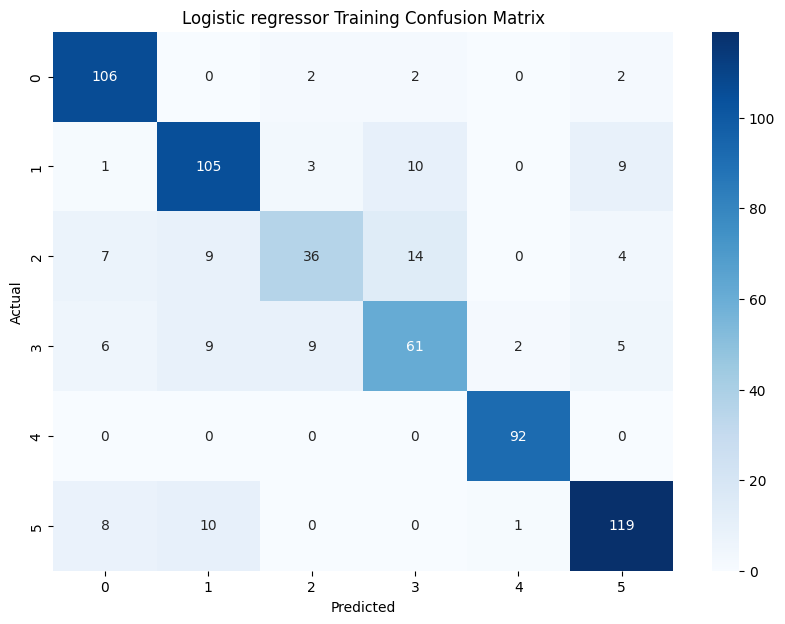

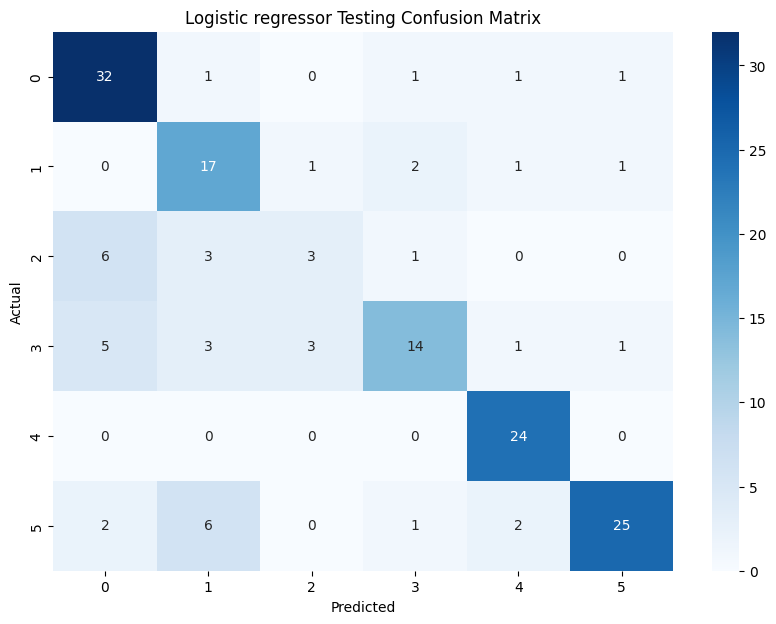

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# logreg = LogisticRegression(solver = 'saga', max_iter = 100000)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_train = model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average = 'micro')
precision_train = precision_score(y_train, y_pred_train, average = 'micro')
recall_train = recall_score(y_train, y_pred_train, average = 'micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"LogisticRegression Classification Accuracy: {accuracy_train:.2f}")
print(f"LogisticRegression Classification F1 Score: {f1_train:.2f}")
print(f"LogisticRegression Classification Precision: {precision_train:.2f}")
print(f"LogisticRegression Classification Recall: {recall_train:.2f}")
print(confusion_mat_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'micro')
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels = ['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"LogisticRegression Classification Accuracy: {accuracy:.2f}")
print(f"LogisticRegression Classification F1 Score: {f1:.2f}")
print(f"LogisticRegression Classification Precision: {precision:.2f}")
print(f"LogisticRegression Classification Recall: {recall:.2f}")
print(confusion_mat)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regressor Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic regressor Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Classification Accuracy (Train): 0.89
SVM Classification F1 Score (Train): 0.89
SVM Classification Precision (Train): 0.89
SVM Classification Recall (Train): 0.89
Training Confusion Matrix:
 [[110   1   0   0   0   1]
 [  1 118   1   2   0   6]
 [  4  11  48   5   0   2]
 [  5   9   4  68   1   5]
 [  1   0   0   0  91   0]
 [  2   5   0   0   1 130]]
SVM Classification Accuracy (Test): 0.75
SVM Classification F1 Score (Test): 0.75
SVM Classification Precision (Test): 0.75
SVM Classification Recall (Test): 0.75
Testing Confusion Matrix:
 [[35  1  0  0  0  0]
 [ 0 18  0  2  0  2]
 [ 5  3  4  1  0  0]
 [ 5  4  2 10  1  5]
 [ 0  0  0  0 24  0]
 [ 1  4  0  1  2 28]]


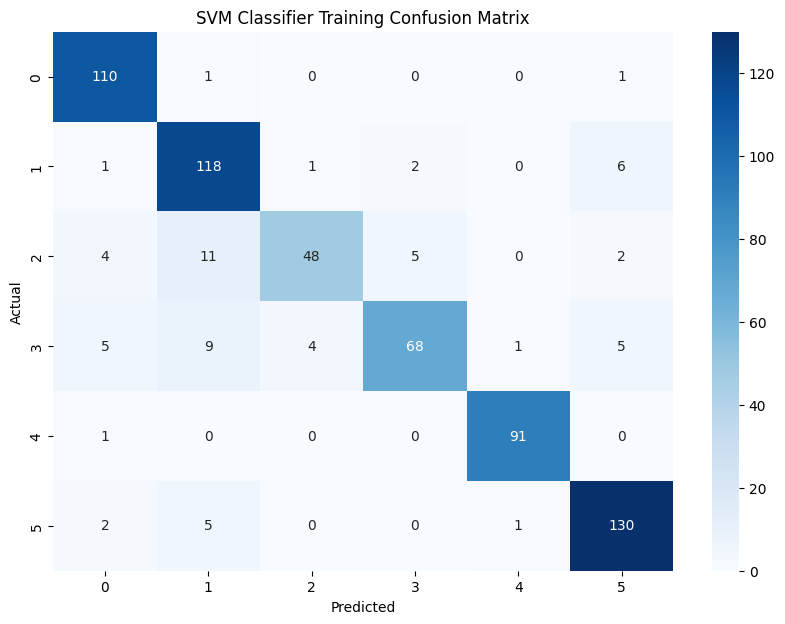

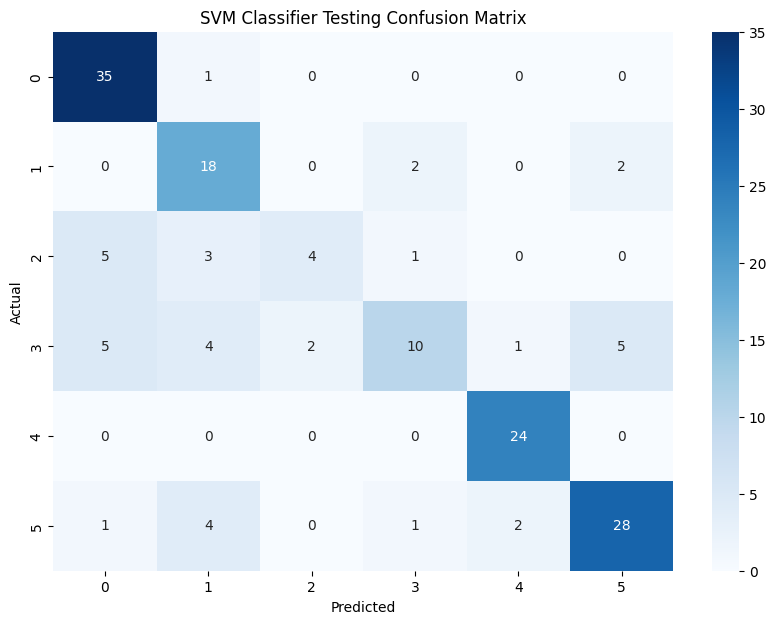

In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Support Vector Classifier model
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate training performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"SVM Classification Accuracy (Train): {accuracy_train:.2f}")
print(f"SVM Classification F1 Score (Train): {f1_train:.2f}")
print(f"SVM Classification Precision (Train): {precision_train:.2f}")
print(f"SVM Classification Recall (Train): {recall_train:.2f}")
print("Training Confusion Matrix:\n", confusion_mat_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate test performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"SVM Classification Accuracy (Test): {accuracy:.2f}")
print(f"SVM Classification F1 Score (Test): {f1:.2f}")
print(f"SVM Classification Precision (Test): {precision:.2f}")
print(f"SVM Classification Recall (Test): {recall:.2f}")
print("Testing Confusion Matrix:\n", confusion_mat)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Classifier Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Classifier Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Classification Accuracy (Train): 0.83
KNN Classification F1 Score (Train): 0.83
KNN Classification Precision (Train): 0.83
KNN Classification Recall (Train): 0.83
Training Confusion Matrix:
 [[110   0   1   1   0   0]
 [  1 113   0   5   0   9]
 [  6  12  36  15   0   1]
 [ 10   4   1  62   1  14]
 [  5   2   0   0  82   3]
 [  8   6   2   2   0 120]]
KNN Classification Accuracy (Test): 0.70
KNN Classification F1 Score (Test): 0.70
KNN Classification Precision (Test): 0.70
KNN Classification Recall (Test): 0.70
Testing Confusion Matrix:
 [[34  1  0  1  0  0]
 [ 1 17  0  2  0  2]
 [ 7  2  0  4  0  0]
 [ 7  3  3  8  1  5]
 [ 1  1  0  0 22  0]
 [ 3  3  0  0  0 30]]


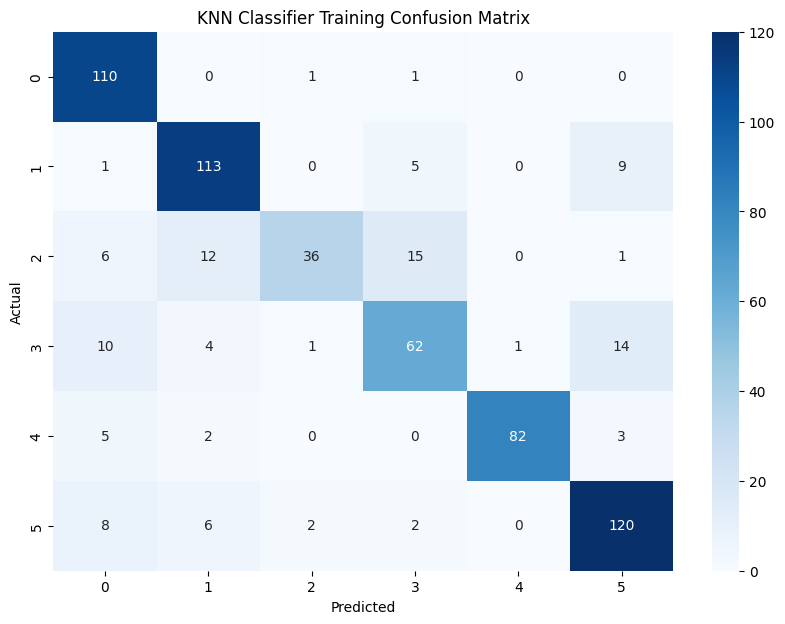

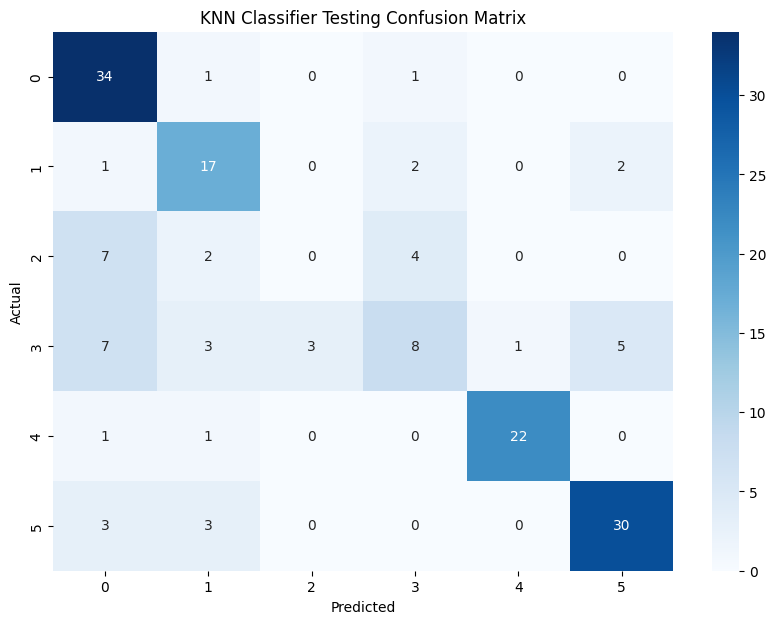

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the K-Nearest Neighbors (KNN) classifier model
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = model.predict(X_train)

# Calculate training performance metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')
confusion_mat_train = confusion_matrix(y_train, y_pred_train, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"KNN Classification Accuracy (Train): {accuracy_train:.2f}")
print(f"KNN Classification F1 Score (Train): {f1_train:.2f}")
print(f"KNN Classification Precision (Train): {precision_train:.2f}")
print(f"KNN Classification Recall (Train): {recall_train:.2f}")
print("Training Confusion Matrix:\n", confusion_mat_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate test performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
confusion_mat = confusion_matrix(y_test, y_pred, labels=['MichaelJackson', 'BhavGeet', 'Lavani', 'AshaBhosle', 'NationalAnthem', 'KishoreKumar'])
print(f"KNN Classification Accuracy (Test): {accuracy:.2f}")
print(f"KNN Classification F1 Score (Test): {f1:.2f}")
print(f"KNN Classification Precision (Test): {precision:.2f}")
print(f"KNN Classification Recall (Test): {recall:.2f}")
print("Testing Confusion Matrix:\n", confusion_mat)

# Plot confusion matrix for training set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_train, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


PCA

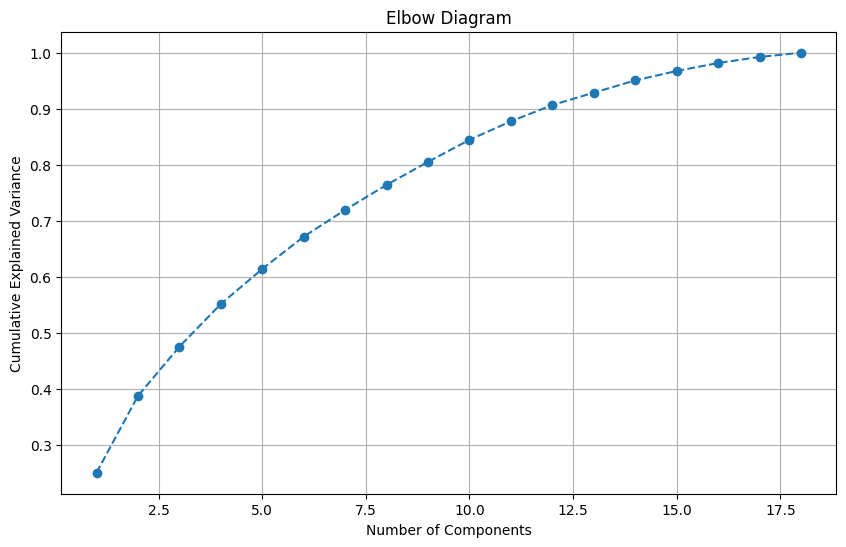

Optimal number of components: 12


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(reduced_features_df)


# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Plot the explained variance ratio to create the elbow diagram
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Diagram')
plt.grid(True)
plt.show()

# Determine the optimal number of components (e.g., where the explained variance exceeds 90%)
optimal_components = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Optimal number of components: {optimal_components}')
